우선 시각화를 위한 테스트를 해 봅시다.

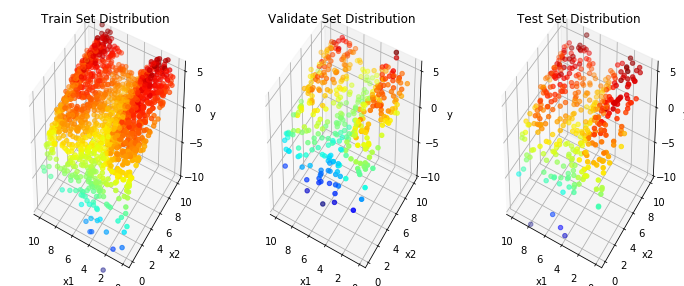

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]
# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validate Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

단순한 토치 program작성하기

In [2]:
import torch
import torch.nn as nn

class LModel(nn.Module):
    def __init__(self):
        super(LModel, self).__init__()
        self.linear = nn.Linear(2, 1, bias=True)
    
    def forward(self, x):
        return self.linear(x)
    
class MLModel(nn.Module):
    def __init__(self):
        super(MLModel, self).__init__()
        self.linear1 = nn.Linear(2, 200)
        self.linear2 = nn.Linear(200, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [3]:
criterion = nn.MSELoss()

cost function 테스트 진행하기

In [4]:
test_pred_y = torch.Tensor([0,0,0,0])
test_true_y = torch.Tensor([0,1,0,1])

print(criterion(test_pred_y, test_true_y))
print(criterion(test_true_y, test_true_y))

tensor(0.5000)
tensor(0.)


Train & Evaluation 하기

Parameter containing:
tensor([[ 0.5628, -0.1274],
        [ 0.1963, -0.1994],
        [ 0.1154, -0.3868],
        [-0.5378, -0.6456],
        [-0.1375, -0.5628],
        [-0.3266,  0.0711],
        [-0.2217, -0.5778],
        [ 0.2445,  0.1301],
        [ 0.1099, -0.3308],
        [ 0.2950,  0.5059],
        [-0.2091, -0.4124],
        [-0.3693, -0.3093],
        [-0.1236,  0.0234],
        [ 0.0926, -0.3848],
        [ 0.3206, -0.6469],
        [ 0.5975,  0.2222],
        [-0.4844,  0.2460],
        [-0.5178, -0.6653],
        [ 0.4474,  0.4955],
        [-0.6487, -0.5897],
        [-0.2549, -0.5783],
        [ 0.4948, -0.1714],
        [-0.6059,  0.6766],
        [-0.6868, -0.4249],
        [-0.0476,  0.1663],
        [-0.1398, -0.4310],
        [ 0.6760, -0.0456],
        [-0.2658,  0.5820],
        [-0.3102, -0.0834],
        [ 0.6802,  0.1675],
        [-0.5456, -0.3950],
        [ 0.2210,  0.5961],
        [ 0.5658,  0.4803],
        [-0.6846, -0.1596],
        [-0.0687,  0.2002]

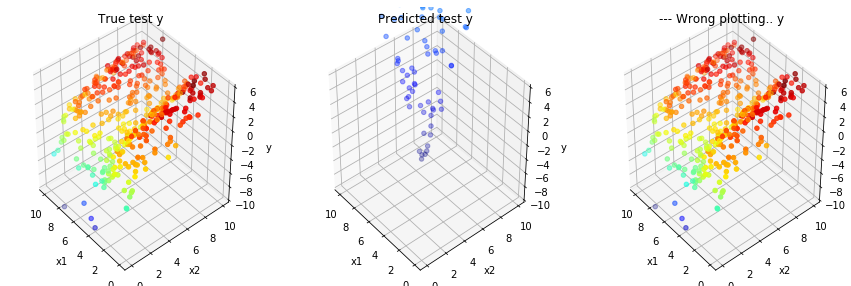

0 tensor(1316.3134, grad_fn=<MseLossBackward>)


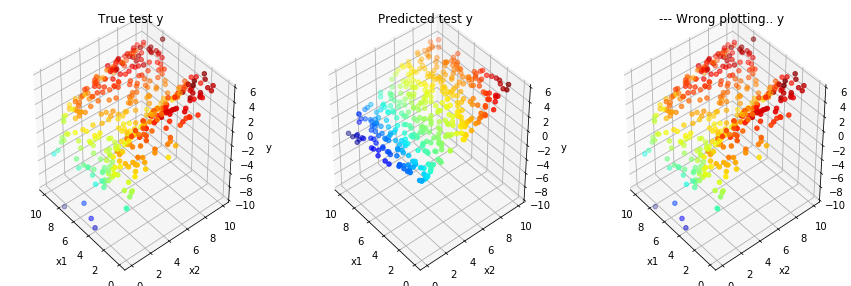

200 tensor(2.4139, grad_fn=<MseLossBackward>)


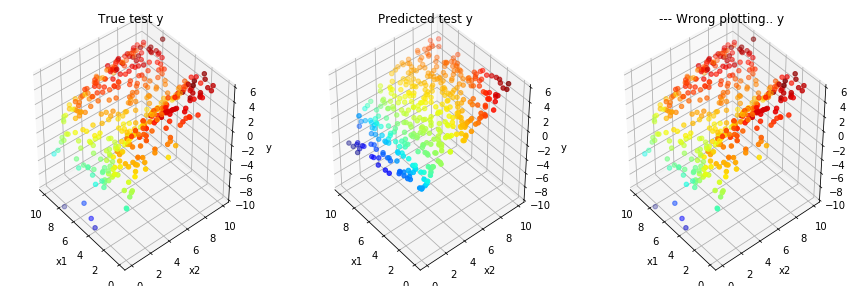

400 tensor(2.0925, grad_fn=<MseLossBackward>)


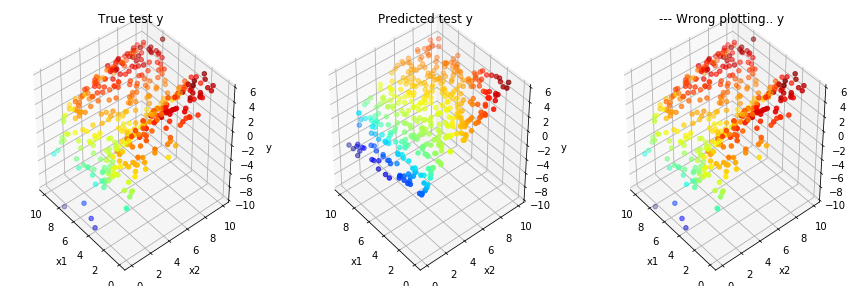

600 tensor(1.9721, grad_fn=<MseLossBackward>)


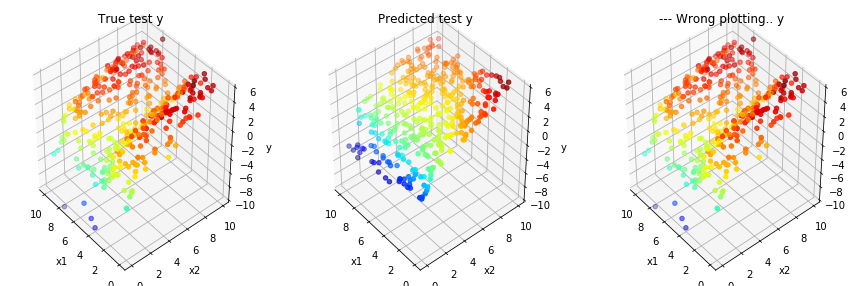

800 tensor(1.9036, grad_fn=<MseLossBackward>)


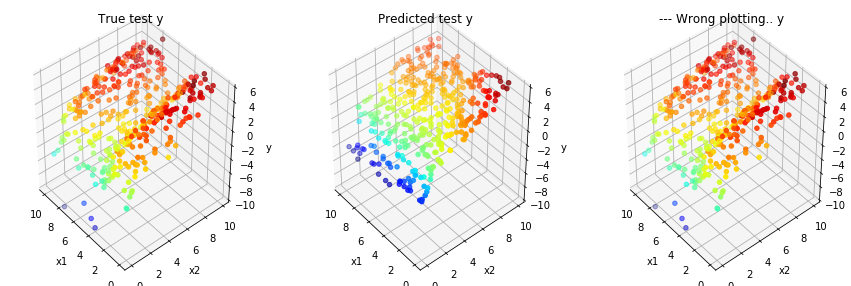

1000 tensor(1.8303, grad_fn=<MseLossBackward>)


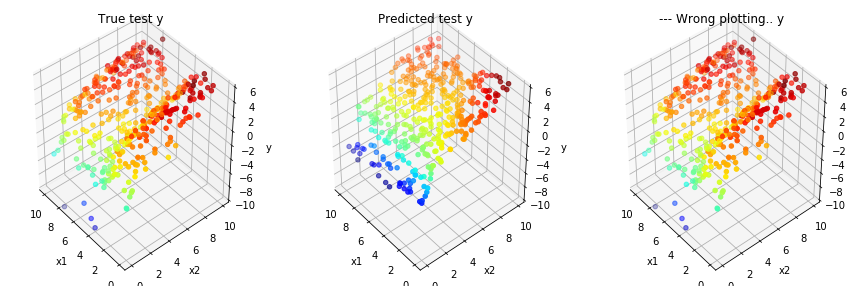

1200 tensor(1.7501, grad_fn=<MseLossBackward>)


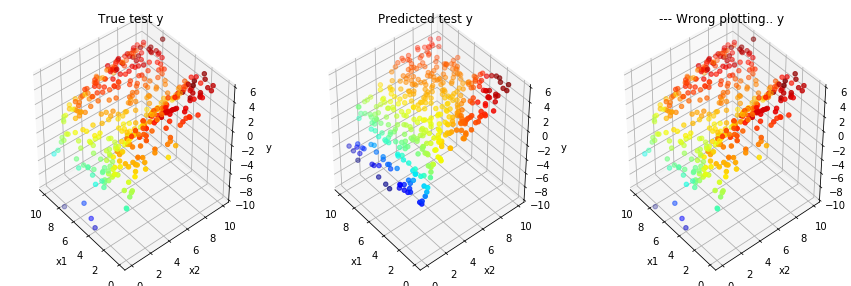

1400 tensor(1.6679, grad_fn=<MseLossBackward>)


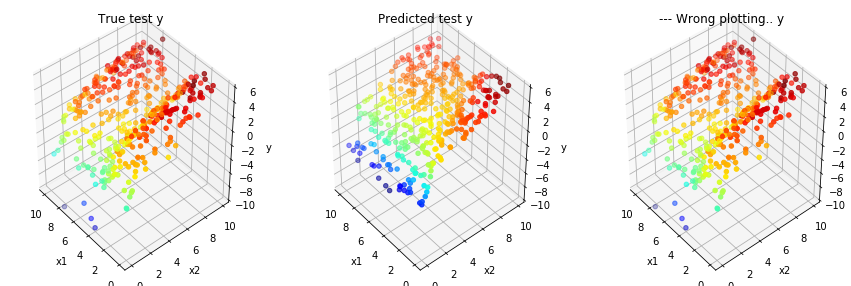

1600 tensor(1.5941, grad_fn=<MseLossBackward>)


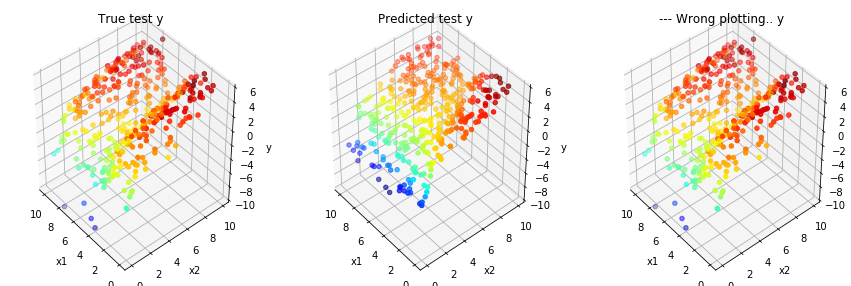

1800 tensor(1.5292, grad_fn=<MseLossBackward>)


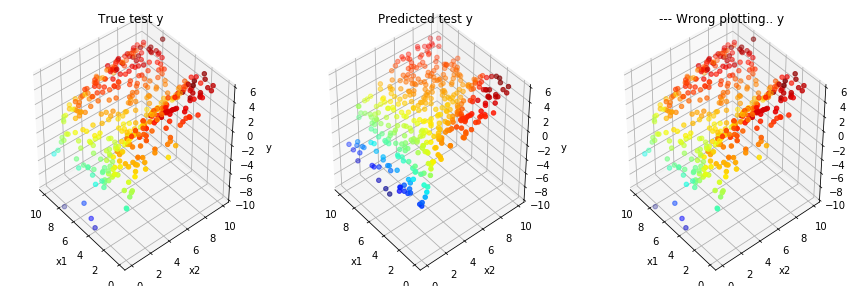

2000 tensor(1.4692, grad_fn=<MseLossBackward>)


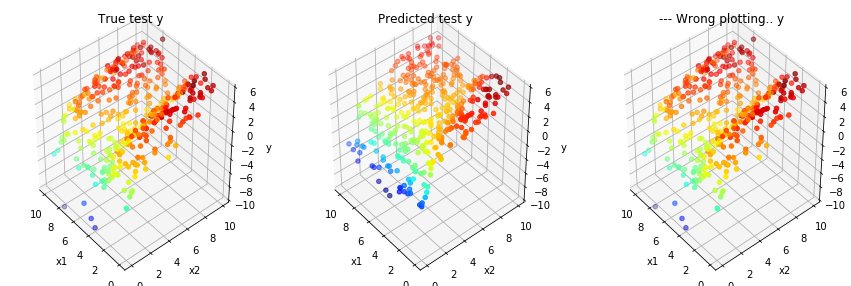

2200 tensor(1.4197, grad_fn=<MseLossBackward>)


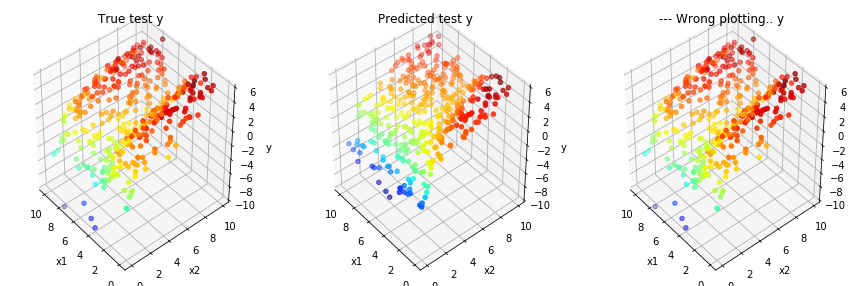

2400 tensor(1.3607, grad_fn=<MseLossBackward>)


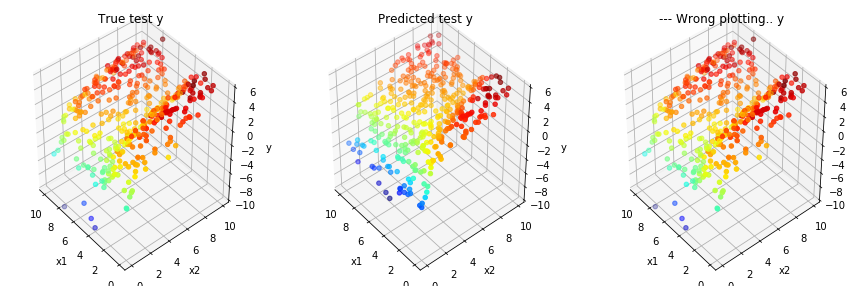

2600 tensor(1.3211, grad_fn=<MseLossBackward>)


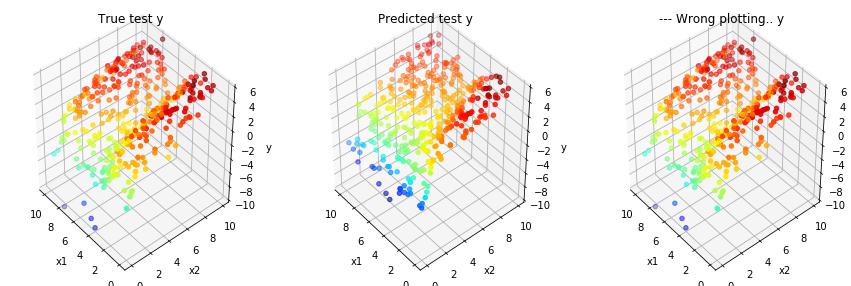

2800 tensor(1.2862, grad_fn=<MseLossBackward>)


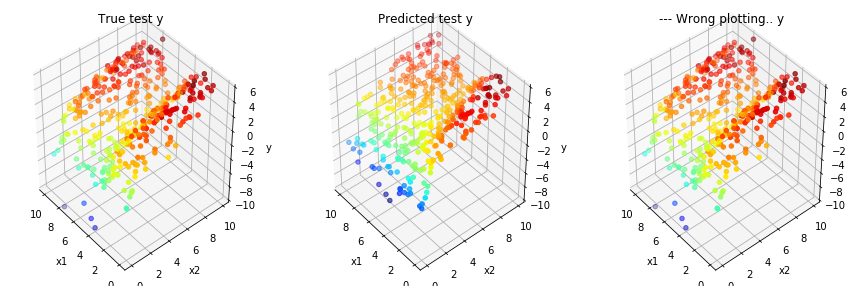

3000 tensor(1.2558, grad_fn=<MseLossBackward>)


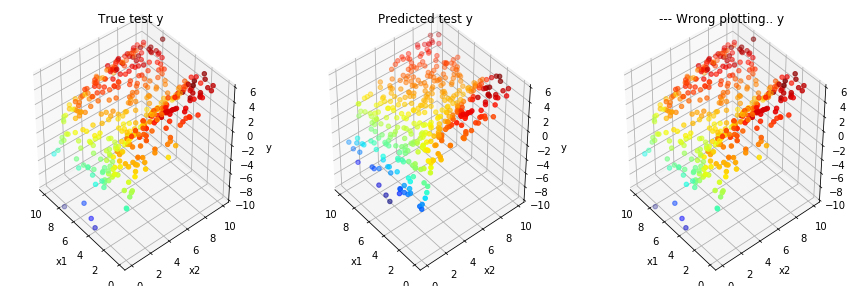

3200 tensor(1.2275, grad_fn=<MseLossBackward>)


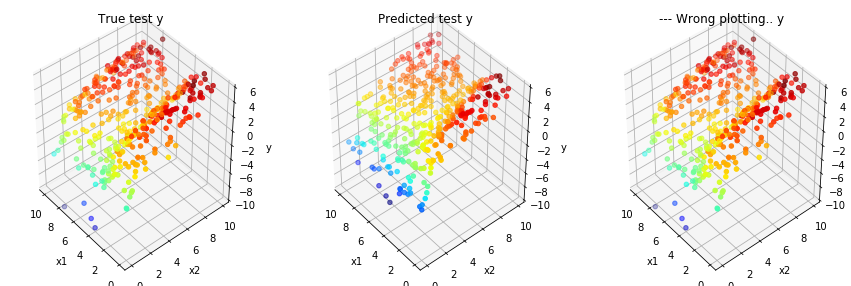

3400 tensor(1.2040, grad_fn=<MseLossBackward>)


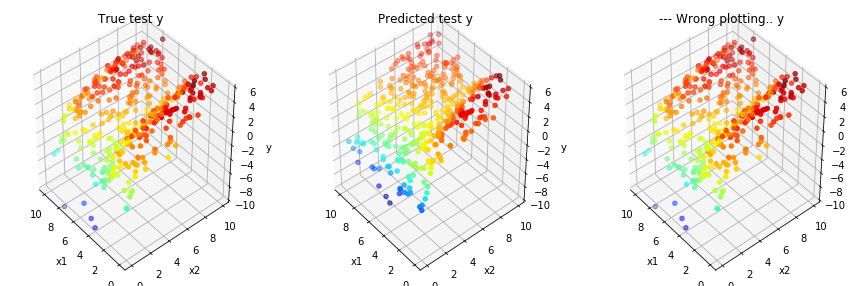

3600 tensor(1.1836, grad_fn=<MseLossBackward>)


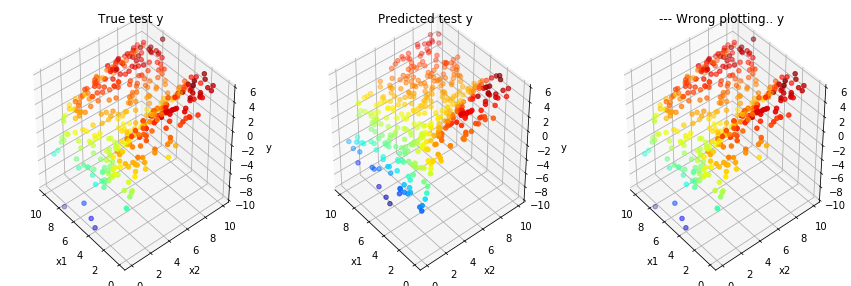

3800 tensor(1.1679, grad_fn=<MseLossBackward>)


In [42]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


model = MLModel()
print(model.linear1.weight)
print(model.linear1.bias)
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr = lr)

# 매 학습 단계에서의 epoch값과 그 때의 loss값을 저장할 list를 만들어 줍니다.
list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []



epoch = 4000
for i in range(epoch):
    # Train 
    model.train()
    optimizer.zero_grad()    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    #print("pred_y.size()", pred_y.size(), "true_y.size()", true_y.size())
    loss = criterion(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.item())
    
    # Validate
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)
    loss = criterion(pred_y.squeeze(), true_y)    
    list_val_loss.append(loss.item())
    
    # EValuation
    if i % 200 == 0:
        
        # Calculate MAE
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).squeeze().detach().numpy()
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # True Y Scattering...
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()
        
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y, cmap='jet')
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()
        
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy()
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('--- Wrong plotting.. y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)


Report Experiment

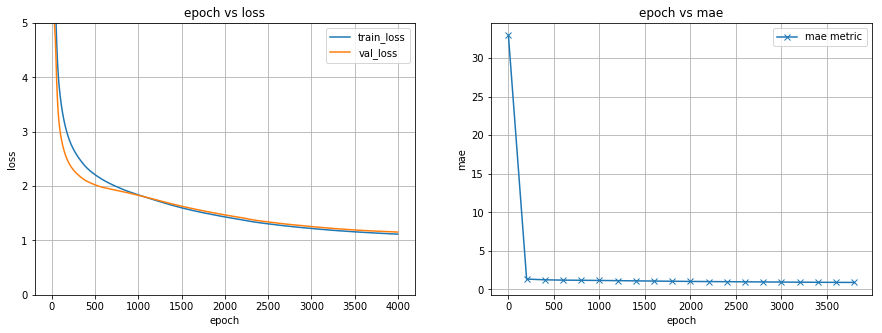

In [43]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

plt.show()